Project Members:                                                  
- Daniel Arday
- Albert Chen

Date:


# Introduction

The UCI Bank Marketing dataset (https://archive.ics.uci.edu/dataset/222/bank+marketing) is a collection of anonymized marketing data based phone calls initiated from a Portuguese banking institution. Multiple contacts to the same client was often required to access if a client would subscribe to a bank term deposit (Sérgio Moro, P. Cortez, P. Rita. 2014).


### Objective

**Our classification goal with this dataset is to predict if banking clients will subscribe to a term deposit.**

### Data Description/Attribuite Information
   1. `age`: age demographic
   2. `job`: employment type
   3. `martial`: martial status
   4. `education`: categorical education status
   5. `default`: credit default
   6. `balance`: average yearly balance
   7. `housing`: housing loan status
   8. `loan`: personal loan status
   9. `contact`: contact communication type
   10. `day`: last contact day of the week
   11. `month`: last contact month
   12. `duration`: last contact duration in seconds
   13. `campaign`: number of repeated contacts with client
   14. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (-1 not previously contacted)
   15. `previous`: 	number of contacts performed before this campaign and for this client
   16. `poutcome`: outcome of the previous marketing campaign
   17. `y`: is client subscribed to term deposit

### Loading libraries and data

In [144]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [146]:
data = pd.read_csv('data/bank-full.csv', sep=';')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Preparation

In [48]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [54]:
#Let's make a copy of the data
df = data.copy()

In [55]:
# Are there any duplicate rows in the data. - Nope!
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

In [75]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="ProdTaken",y=data[x],palette="rocket")
    plt.show()
    
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")#.sort_values(
        #by=sorter, ascending=False
    #)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate/Plot Analysis

In [62]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Observations on Term Deposit Subscription

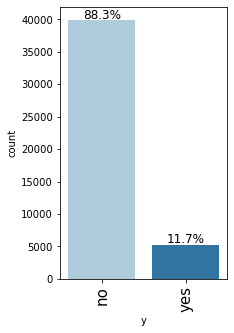

In [76]:
#y = yes they are subscribed
labeled_barplot(df,"y",perc=True)

### Observations on Age


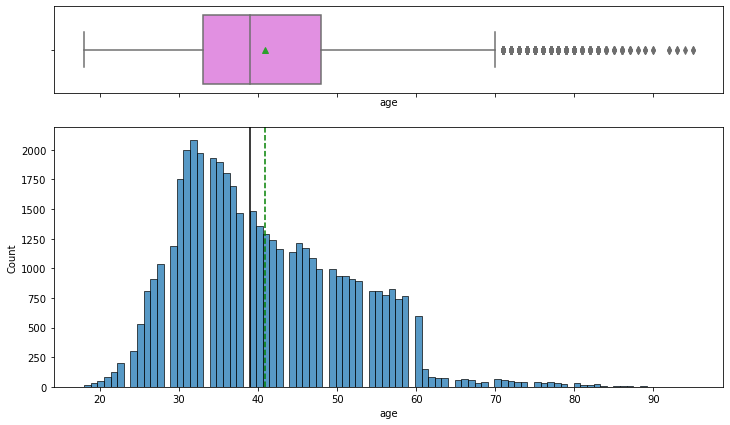

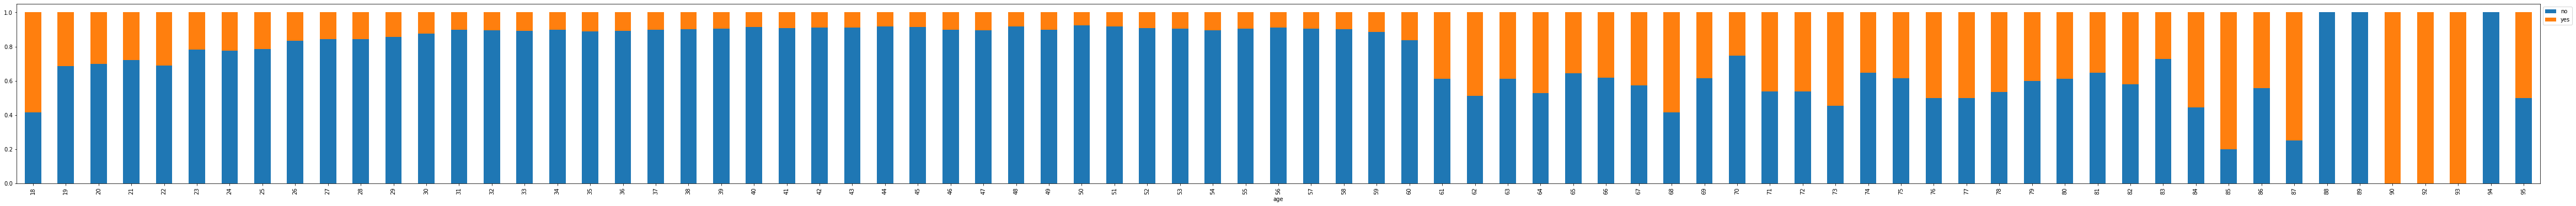

In [73]:
#Age
cat = "age"
histogram_boxplot(df, cat)
stacked_barplot(df, cat, "y")

`Age` ranges from 18 to 95 years is normaly distributed but somewhat skewed to the right. We can see that older customers are more likely to have a subscription to a term deposit.

### Observations on Job

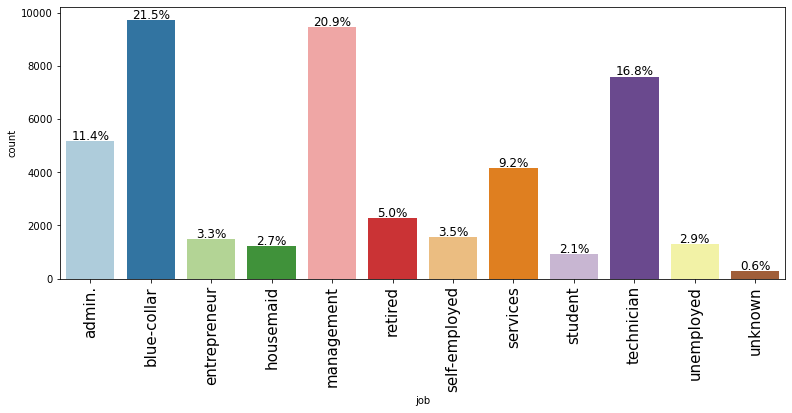

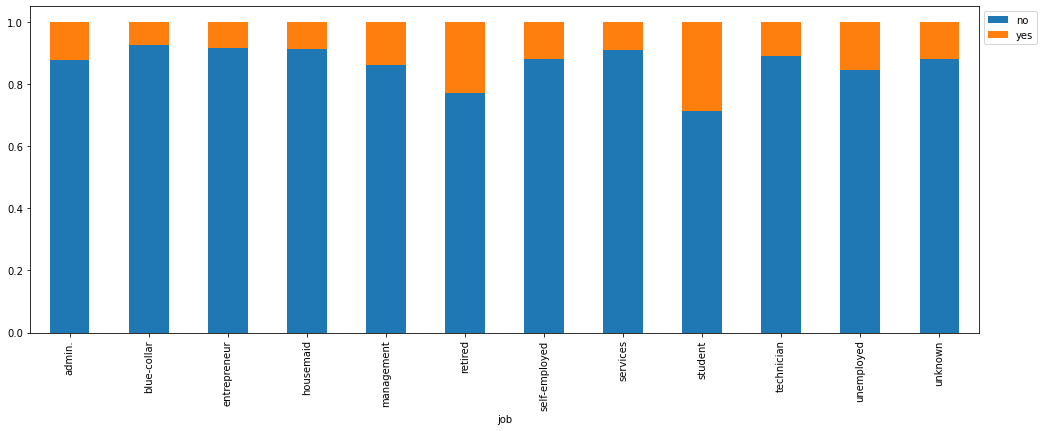

In [79]:
cat = "job"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Marital Status

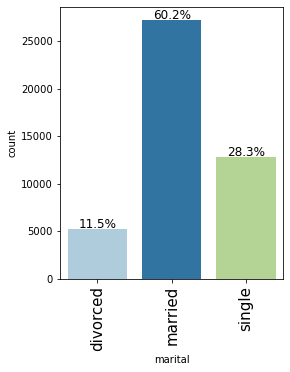

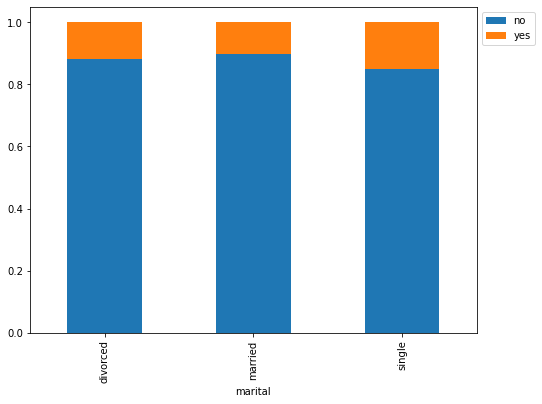

In [80]:
cat = "marital"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Education

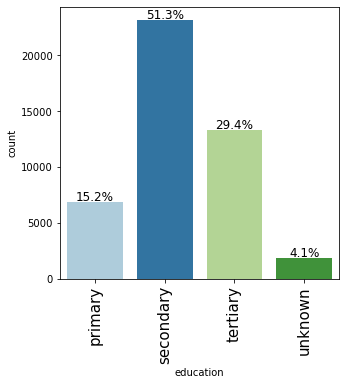

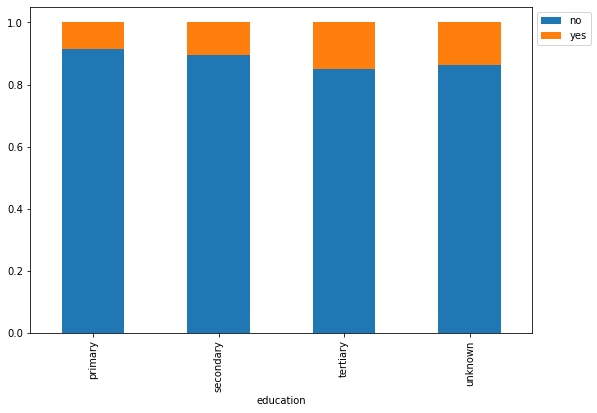

In [81]:
cat = "education"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Default

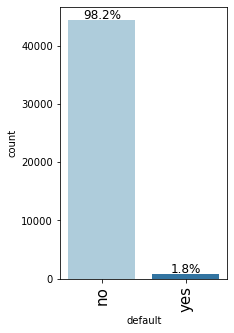

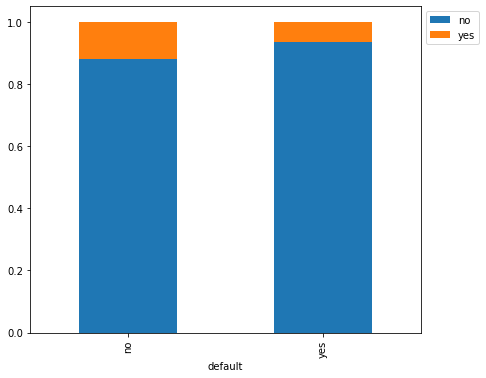

In [84]:
cat = "default"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Balance

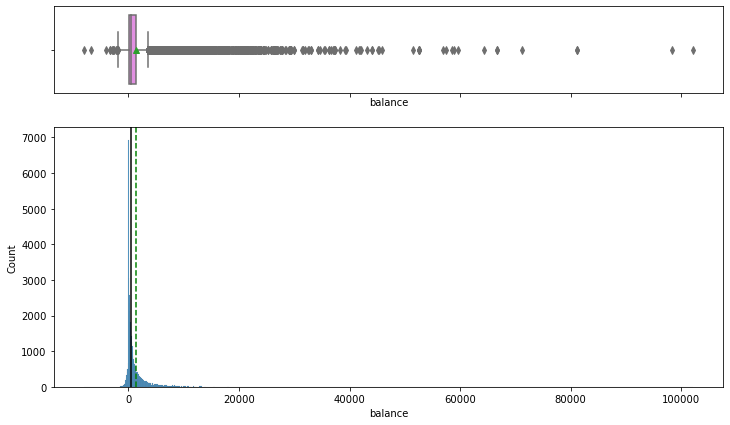

In [88]:
cat = "balance"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - Some people have ridiculously high balances

`Balance`

### Observations on Housing

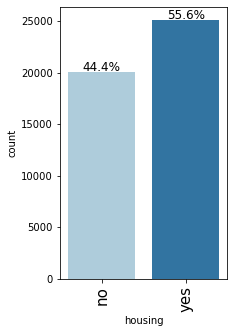

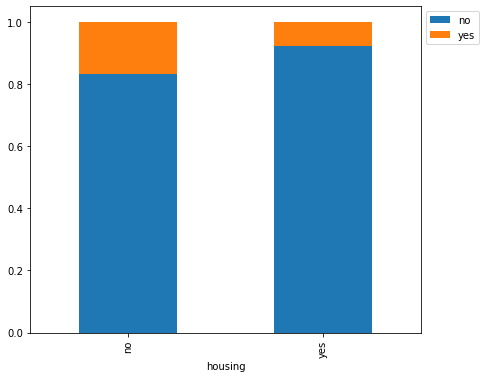

In [91]:
cat = "housing"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`housing`

### Observations on Loan

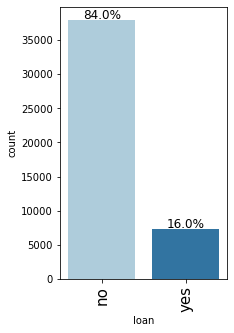

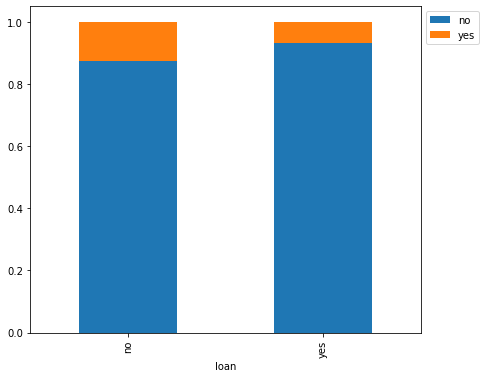

In [92]:
cat = "loan"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`loan`

### Observations on Contact

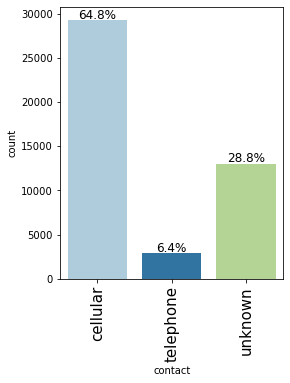

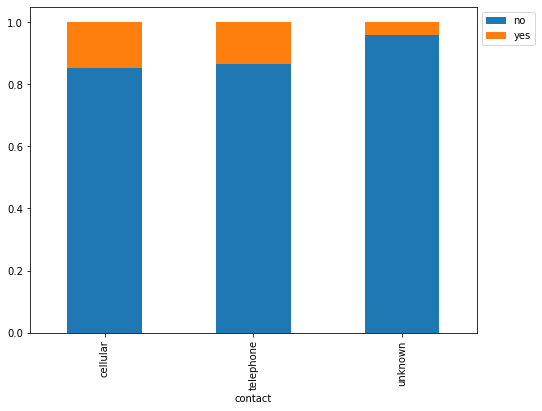

In [96]:
cat = "contact"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`contact`

### Observations on Day

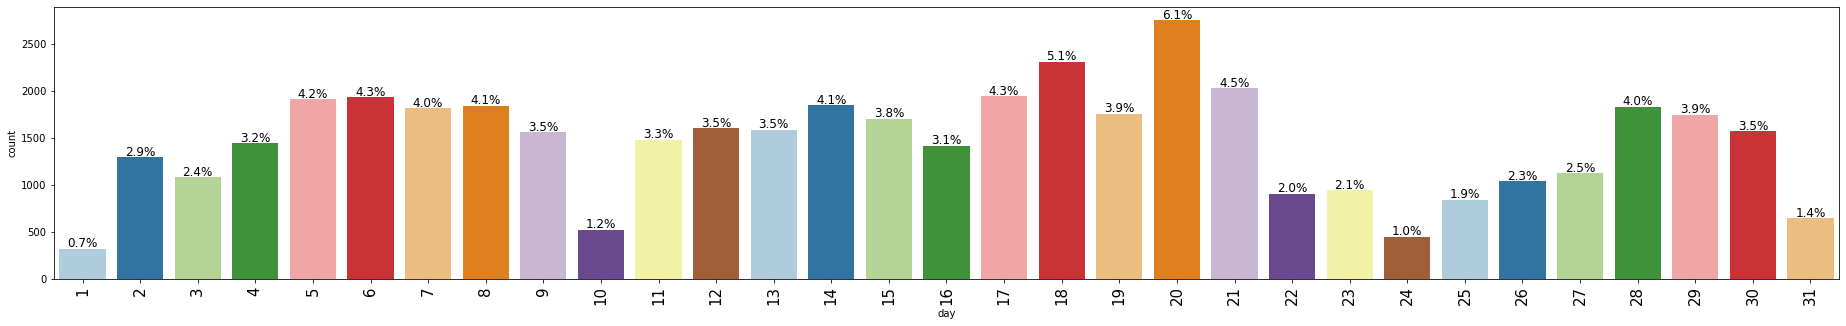

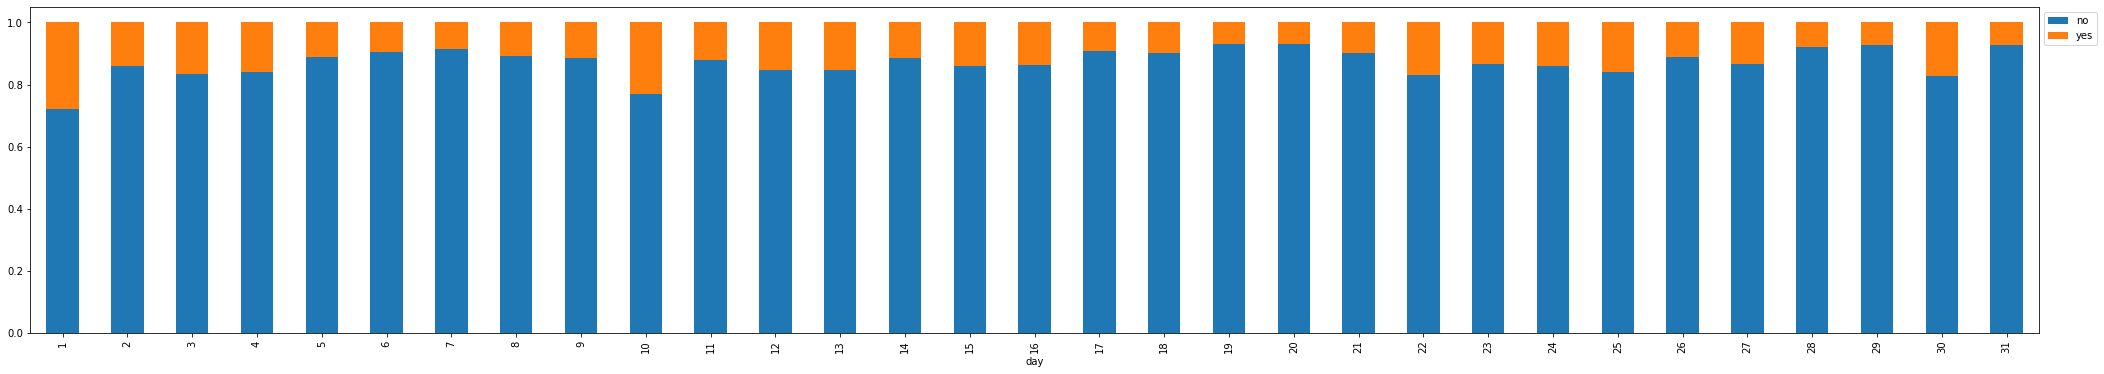

In [98]:
cat = "day"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`day`

### Observations on Month

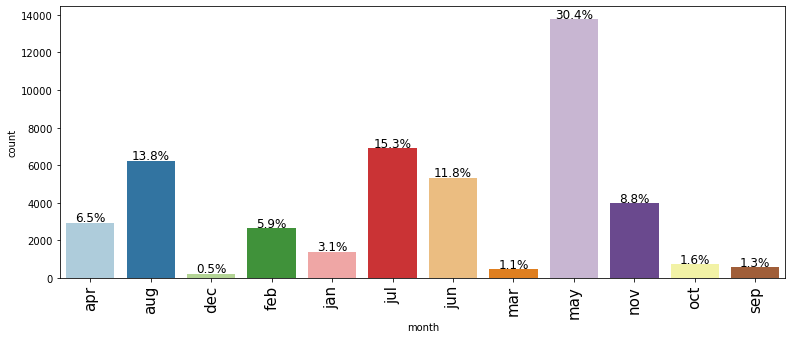

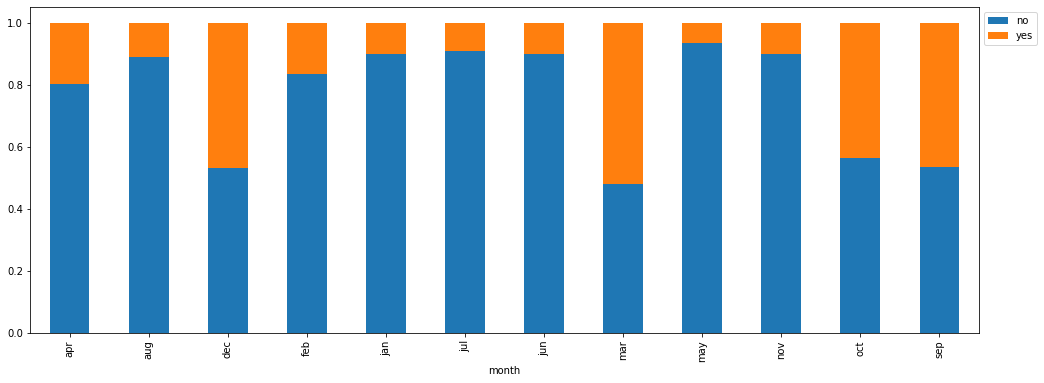

In [99]:
cat = "month"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`month`

### Observations on Duration

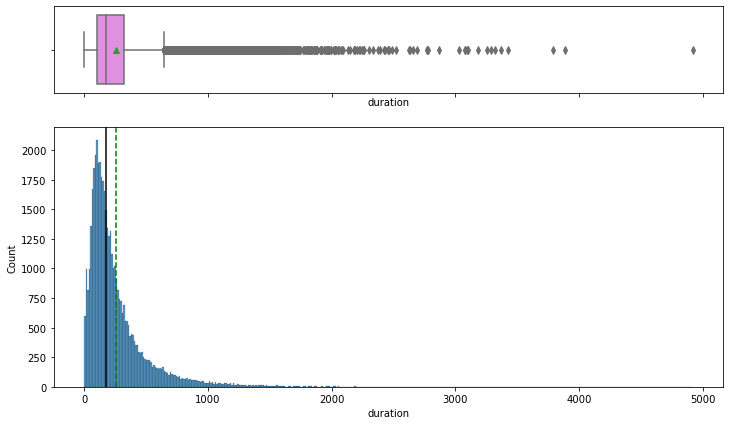

In [101]:
cat = "duration"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - so maybe convert this to minutes to be able to see all

`duration`

### Observations on Campaign

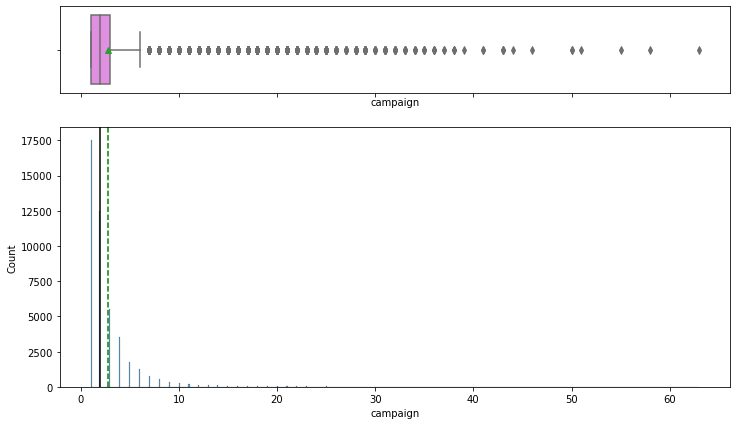

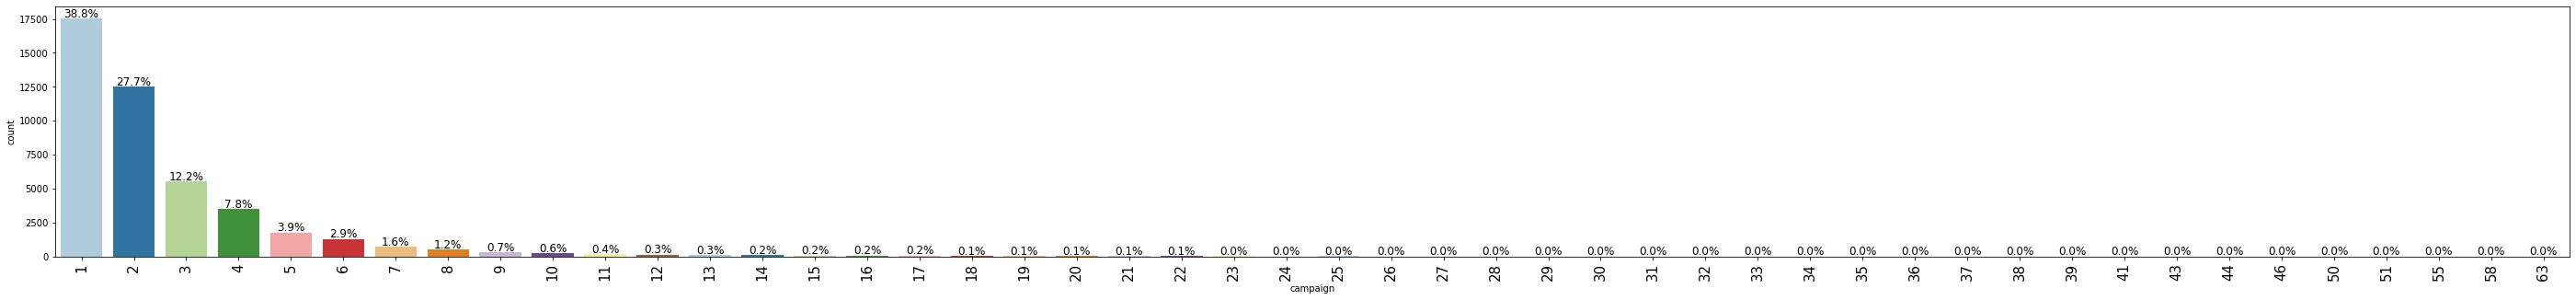

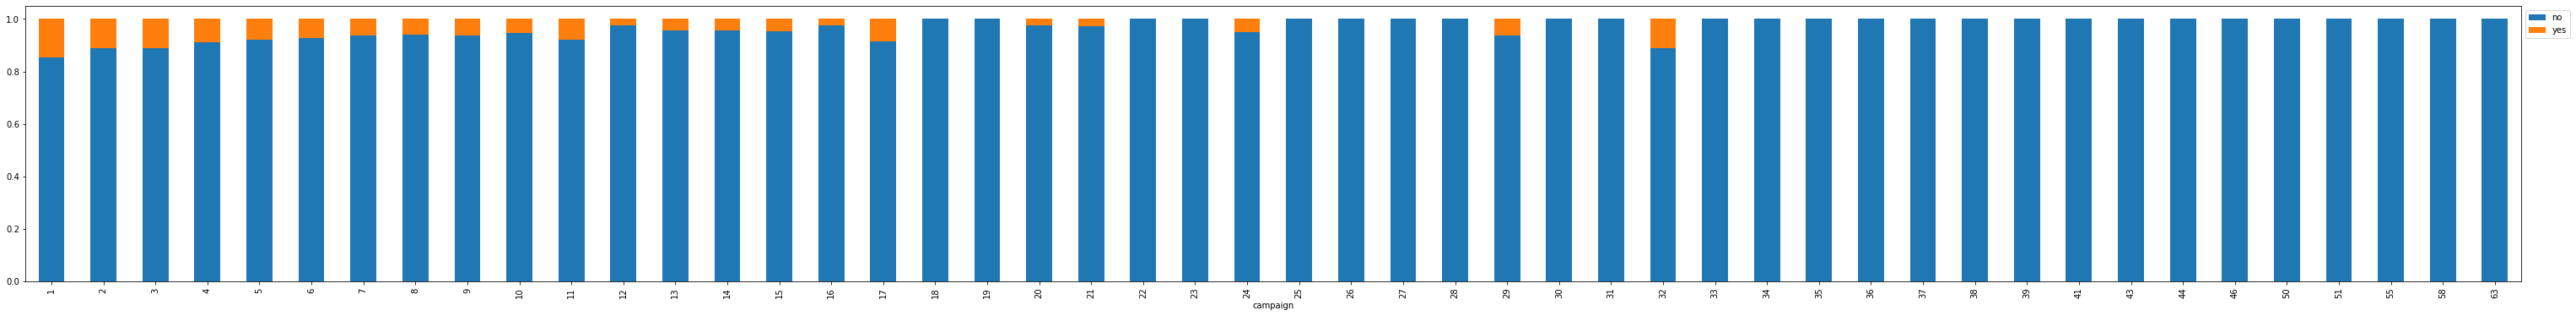

In [104]:
cat = "campaign"
histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`campaign`

### Observations on P Days 
(Number days elapsed from a previous a campaign contact)

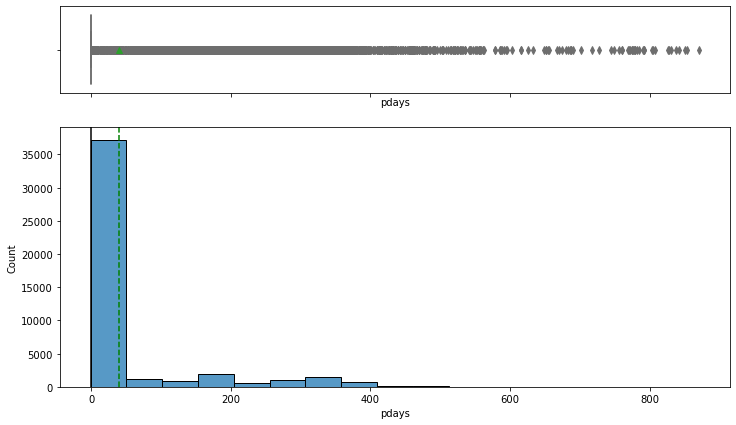

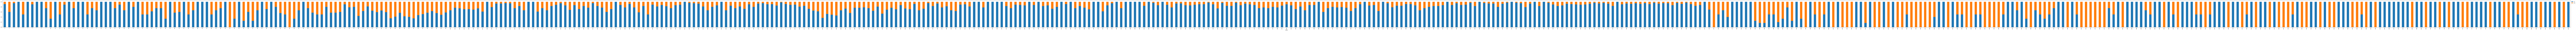

In [107]:
cat = "pdays"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`pdays` need to account for negative ones in this case

### Observations on Previous
Number of concacts before this campaign started

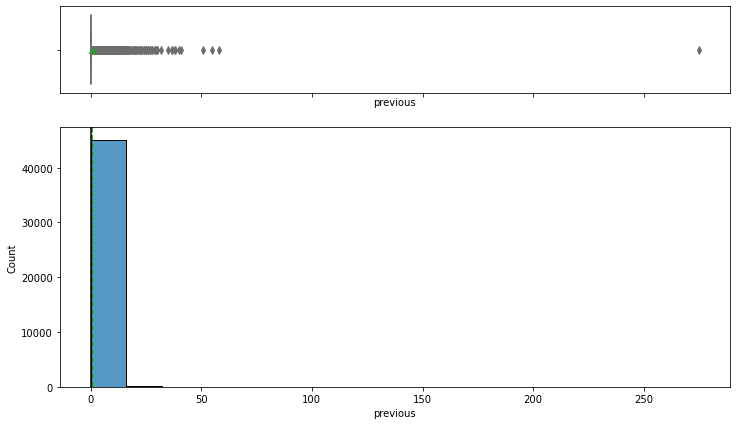

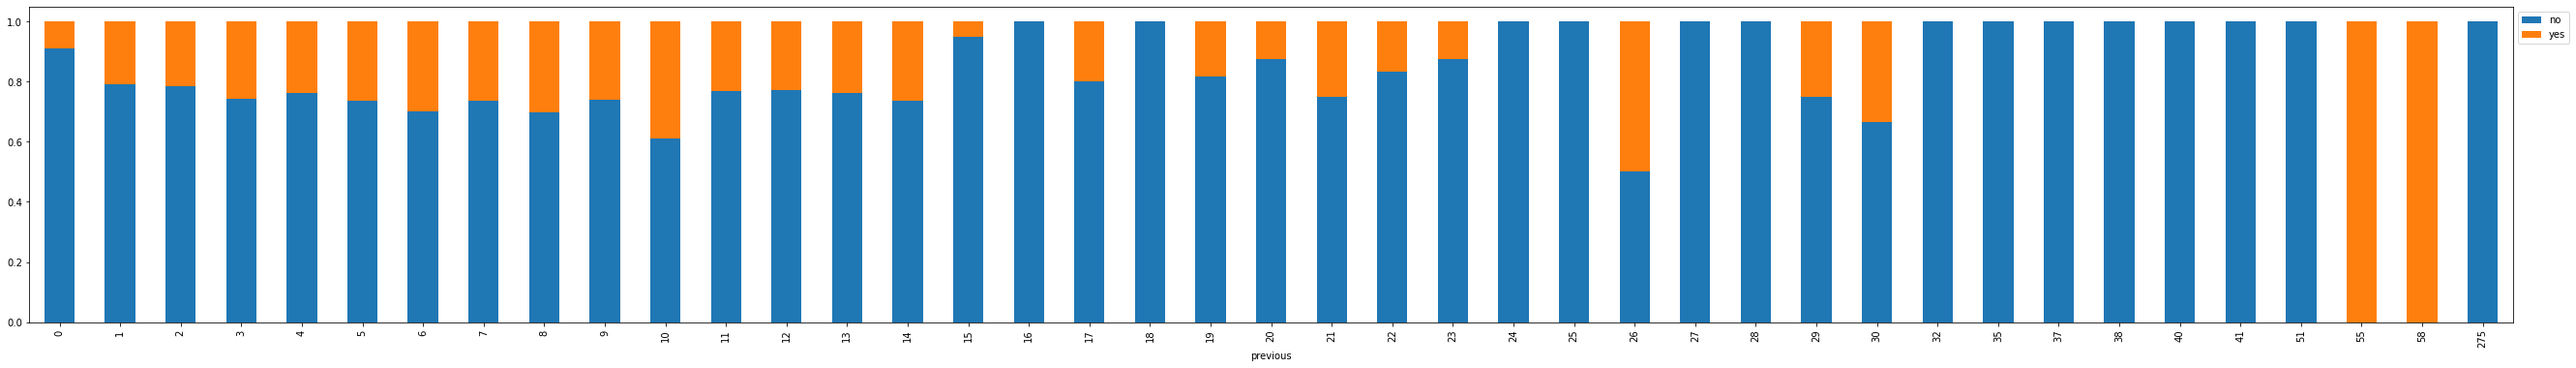

In [110]:
cat = "previous"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`previous` - drop 275

### Observations on PoutCome
The outcome of the previous marketing campaign

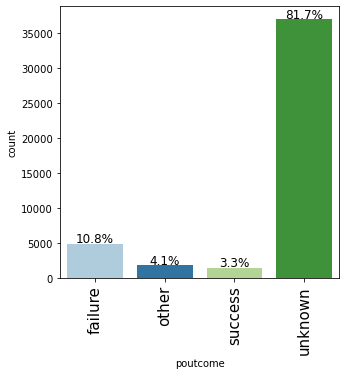

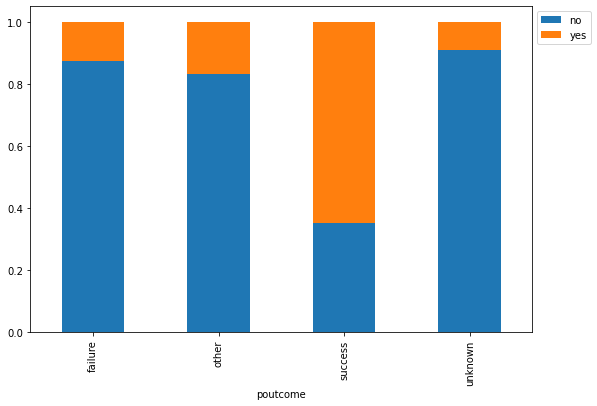

In [117]:
cat = "poutcome"
# histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`poutcome` - if they were successfully convinced by the previous marketing campaign they were very likely convinced by this one as well.

### Multivariate Analysis

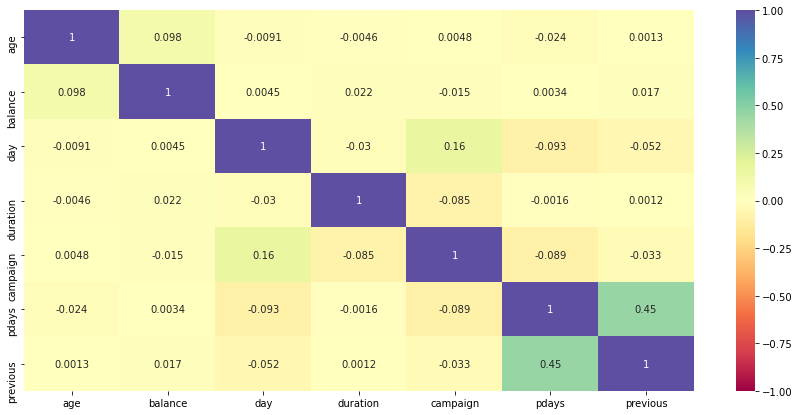

In [124]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Conclusions on EDA

Some thots

# Data-Prep

In [119]:
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

### Split the Data

In [129]:
X = df.drop(['y'], axis=1)
y = df['y']

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Training:", X_train.shape[0], "  Validation:", X_val.shape[0] , "  Test:", X_test.shape[0])

Training: 27126   Validation: 9042   Test: 9043


### One Hot Encoding

#### Let's see if the following categorical columns can be easily encoded and if there are any values that need to be imputed

In [135]:
enc_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [136]:
for i in enc_cols:
    print(i, ":", data[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']


Looks like all the data is well formatted and there is no need imputation

In [127]:
# df_enc = pd.get_dummies(data, enc_cols)
# df_enc.head(5)

In [60]:
# df_enc.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [137]:
X_train = pd.get_dummies(data=X_train, columns=enc_cols, drop_first=True)
X_val = pd.get_dummies(data=X_val, columns=enc_cols, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=enc_cols, drop_first=True)
y_train = pd.get_dummies(data=y_train, columns=enc_cols, drop_first=True)
y_val = pd.get_dummies(data=y_val, columns=enc_cols, drop_first=True)
y_test = pd.get_dummies(data=y_test, columns=enc_cols, drop_first=True)

We are doing this because using drop_first=True in pd.get_dummies is a good practice to avoid multicollinearity in our features, thereby making the model more stable and interpretable.

# Model-Prep

### Classification

We will be using 3 different types classification methods:

- Decison Tree
- XGBoost
- SVM

(Old 6)
- BaggingClassifier
- Random Forest
- Gradient Boost
- Adaboost
- XGBoost
- DecisionTree

# Model Construction & Evaluation

# Model-Performance & Improvements

One thing to consider with improving the model is does dropping the outliers improve efficency.

Optional k-fold split on 7 splits

In [148]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

def do_model_cv_and_scoring(X_train, y_train, scoring="recall"):
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Bagging", BaggingClassifier(random_state=1, n_jobs=-1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1, n_jobs=-1)))
    models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)))
    models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models
    score = []
    
    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance ({}):" "\n".format(scoring))
    for name, model in models:
        kfold = StratifiedKFold(
            n_splits=7, shuffle=True, random_state=1
        )  # Setting number of splits equal to 7
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {:.2%}".format(name, cv_result.mean()))

    print("\n" "Validation Performance ({}):" "\n".format(scoring))

    for name, model in models:
        model.fit(X_train, y_train)
        prediction=model.predict(X_val)
        if (scoring=="recall"):
            scores = recall_score(y_val, prediction)
        elif(scoring=="precision"):
            scores = precision_score(y_val, prediction)
        else:
            scores = accuracy_score(y_val, prediction)
        score.append(scores)
        print("{}: {:.2%}".format(name, scores))
        
    return results

results=do_model_cv_and_scoring(X_train, y_train)


Cross-Validation Performance (recall):

Bagging: 40.65%
Random forest: 39.08%
GradientBoost: 41.22%
Adaboost: 38.04%
XGBoost: 48.19%
DecisionTree: 46.48%

Validation Performance (recall):

Bagging: 38.28%
Random forest: 38.94%
GradientBoost: 40.26%
Adaboost: 36.48%
XGBoost: 47.54%
DecisionTree: 45.27%


# Conclusion

### BaggingClassifier

### Conclusions